# Lesson 12 - Trees and Forests

**Don't run on your computer unless you want to try to figure out how to install GraphViz binaries, just save to google colab and run there** <br> 

SKLearn Trees Documenation: https://scikit-learn.org/stable/modules/tree.html <br>
First section originally from: https://www.datacamp.com/community/tutorials/decision-tree-classification-python <br>
Diabetes Dataset: https://www.kaggle.com/uciml/pima-indians-diabetes-database?select=diabetes.csv <br>

Graphviz documenation (to plot decision trees): https://www.graphviz.org/documentation/ <br>

## Import Libraries

In [3]:
# Load libraries
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Decision Trees

## Diabetes Data

### Load Data

In [5]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv", header=0, names=col_names)

In [6]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Train a Decision Tree

In [7]:
#split dataset into features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [8]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [9]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [10]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6753246753246753


### Output the Decision Tree

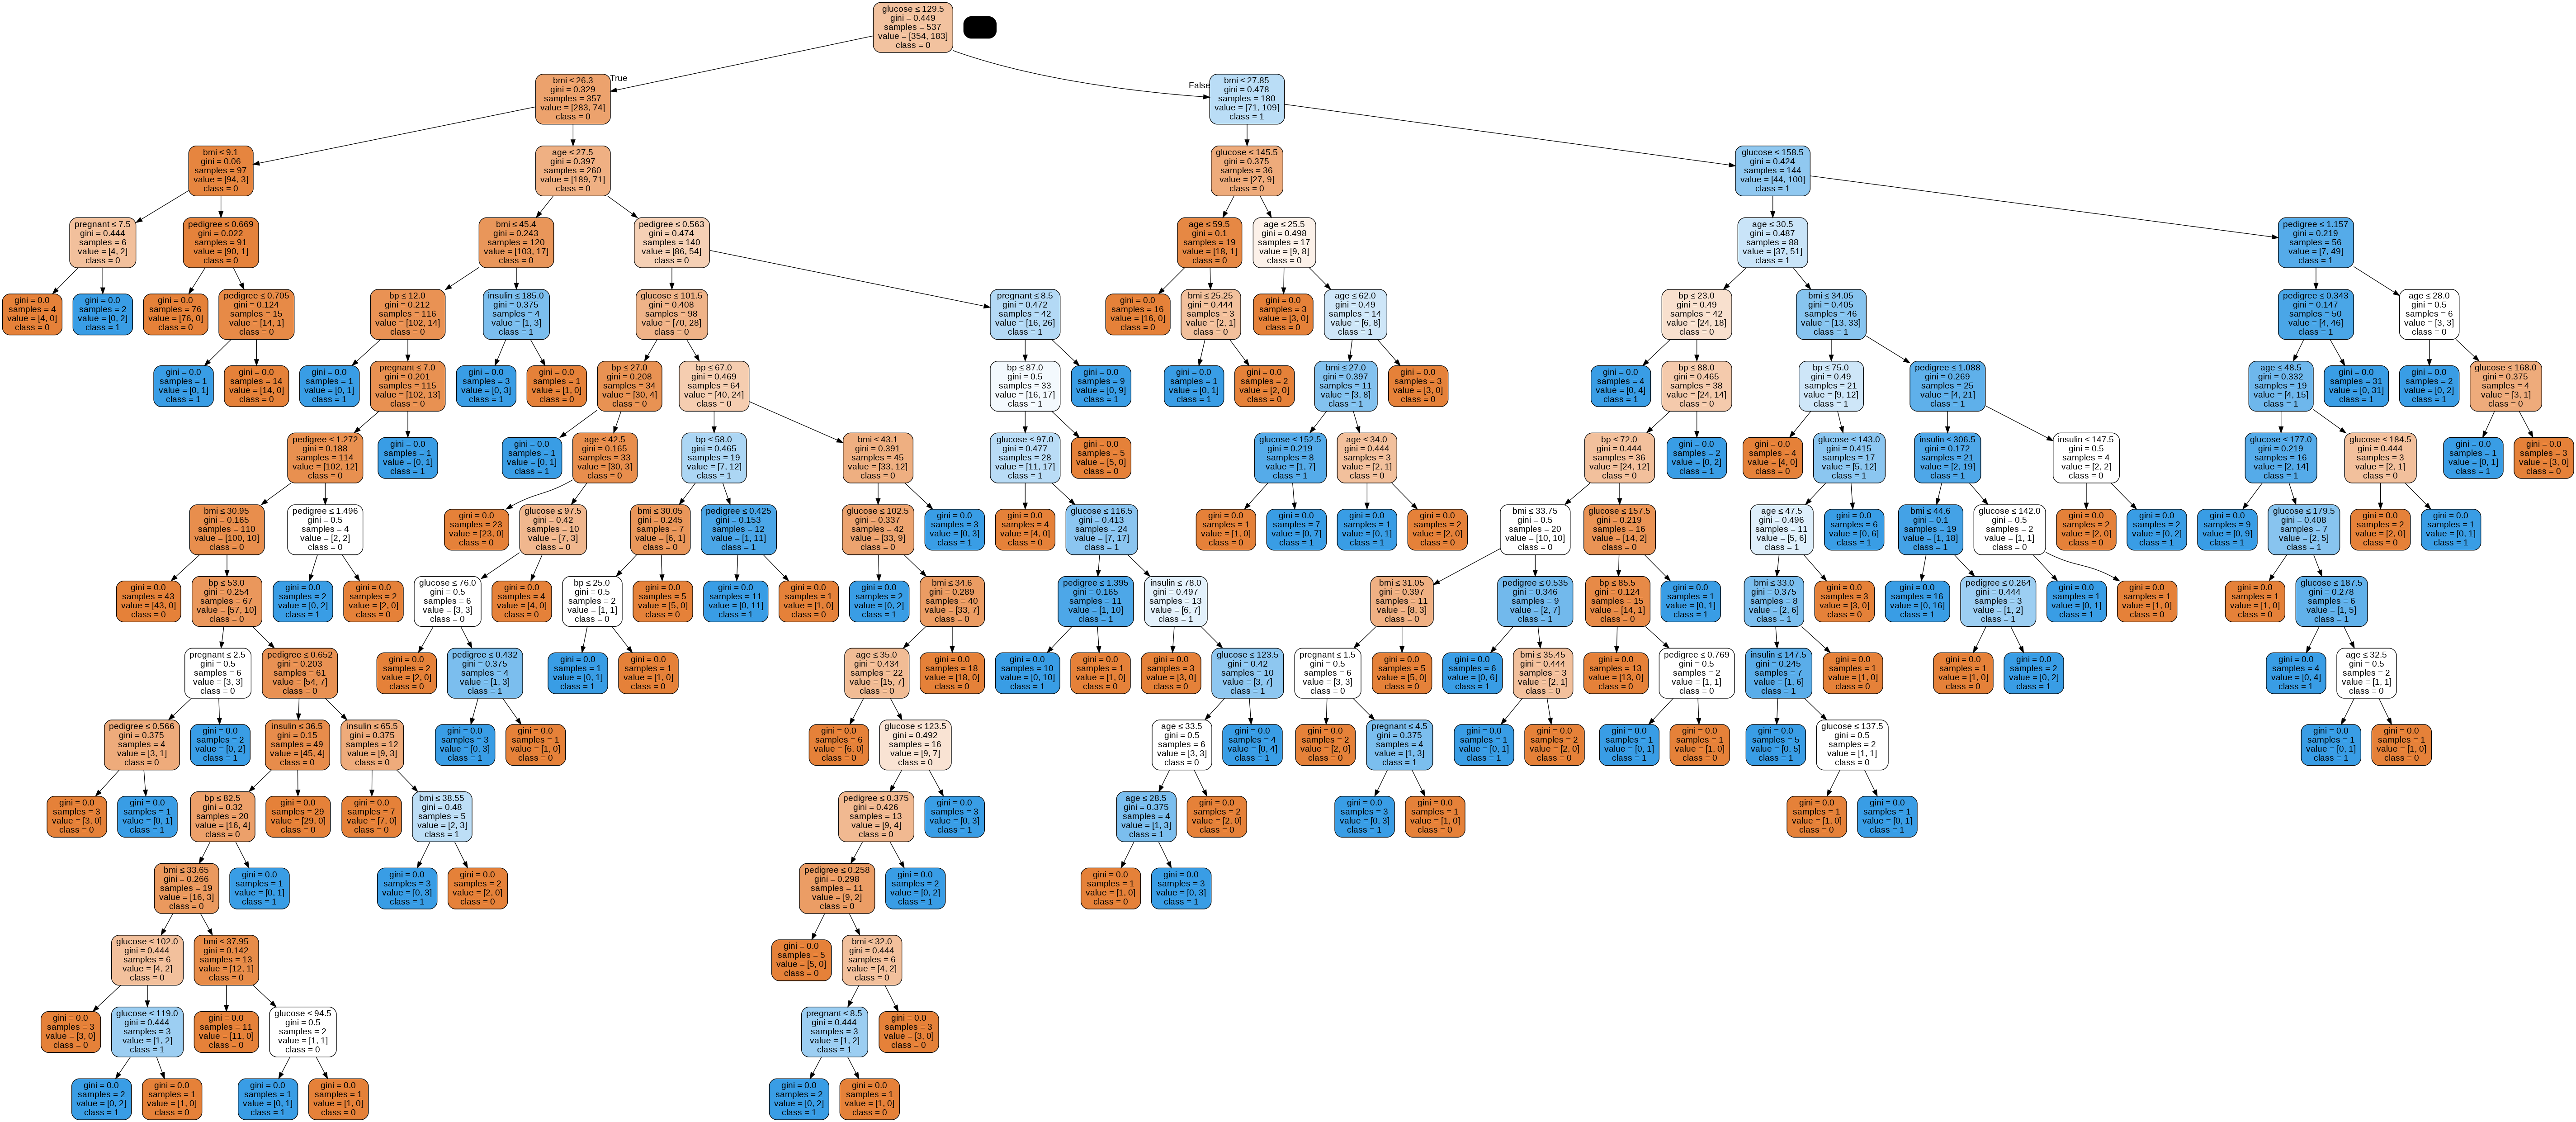

In [11]:
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

# Random Forests

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
forest = RandomForestClassifier(n_estimators=100, random_state=100)

In [16]:
# Fitting a model and making predictions
forest.fit(X_train,y_train)
predictions = forest.predict(X_test)

In [17]:
# Evaluating the model
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.7792207792207793


In [18]:
importances = pd.Series(forest.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)
print(importances)

glucose     0.256902
bmi         0.193212
pedigree    0.140818
age         0.137077
bp          0.098885
pregnant    0.091578
insulin     0.081528
dtype: float64
